In [1]:
import pandas as pd
import requests
from io import StringIO

api_url = "https://www.fema.gov/api/open/v2/DisasterDeclarationsSummaries.csv"

response = requests.get(api_url)

if response.status_code == 200:
    # Access the CSV data from the response
    csv_data = response.content.decode('utf-8')
    csv_io = StringIO(csv_data)
    
    # Convert the CSV data to a Pandas DataFrame
    df = pd.read_csv(csv_io)
    print(df.head())


    
else:
    print("Error:", response.status_code)

  femaDeclarationString  disasterNumber state declarationType  \
0            FM-5465-NM            5465    NM              FM   
1            FM-5465-NM            5465    NM              FM   
2            FM-5464-RI            5464    RI              FM   
3            FM-5463-KS            5463    KS              FM   
4            FM-5462-NE            5462    NE              FM   

            declarationDate  fyDeclared incidentType  \
0  2023-05-10T00:00:00.000Z        2023         Fire   
1  2023-05-10T00:00:00.000Z        2023         Fire   
2  2023-04-14T00:00:00.000Z        2023         Fire   
3  2023-04-13T00:00:00.000Z        2023         Fire   
4  2023-04-09T00:00:00.000Z        2023         Fire   

                   declarationTitle  ihProgramDeclared  iaProgramDeclared  \
0                    LAS TUSAS FIRE                  0                  0   
1                    LAS TUSAS FIRE                  0                  0   
2                 QUEENS RIVER FIRE      

Types of Disasters reported:

 ['Fire' 'Severe Storm' 'Winter Storm' 'Flood' 'Tornado' 'Snowstorm'
 'Earthquake' 'Hurricane' 'Tropical Storm' 'Mud/Landslide' 'Coastal Storm'
 'Other' 'Severe Ice Storm' 'Biological' 'Dam/Levee Break' 'Typhoon'
 'Volcanic Eruption' 'Freezing' 'Toxic Substances' 'Chemical' 'Terrorist'
 'Drought' 'Human Cause' 'Fishing Losses' 'Tsunami']
Occurrences:

 Severe Storm         17705
Hurricane            13046
Flood                10722
Biological            7857
Snowstorm             3707
Fire                  3624
Severe Ice Storm      2942
Tornado               1572
Drought               1292
Coastal Storm          637
Other                  307
Freezing               301
Earthquake             228
Typhoon                130
Winter Storm            79
Tropical Storm          61
Volcanic Eruption       51
Fishing Losses          42
Mud/Landslide           37
Dam/Levee Break         13
Toxic Substances         9
Chemical                 9
Tsunami              

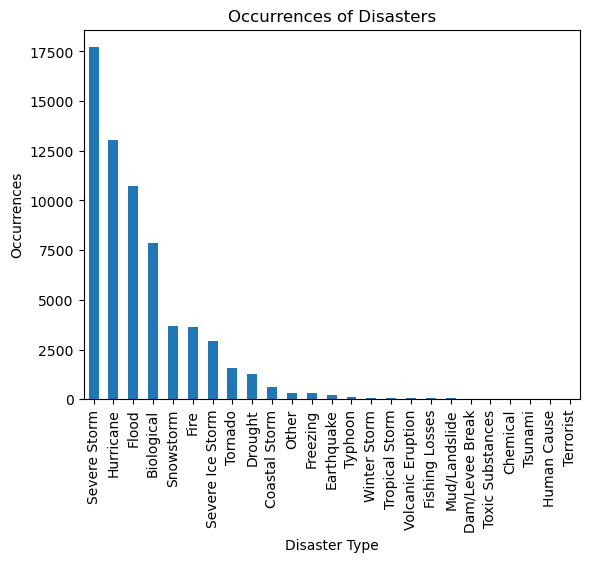

In [2]:
#types of disasters reported and their accourences in the dataset

disaster_types = df['incidentType'].unique()
print("Types of Disasters reported:\n\n", disaster_types)
occurrences = df['incidentType'].value_counts()
print("Occurrences:\n\n", occurrences)
import matplotlib.pyplot as plt

occurrences.plot(kind='bar')
plt.xlabel('Disaster Type')
plt.ylabel('Occurrences')
plt.title('Occurrences of Disasters')
plt.show()

   state  incidentType
50    TX          5195
28    MO          2702
20    KY          2693
52    VA          2524
21    LA          2493
41    OK          2480
10    FL          2353
12    GA          2278
32    NC          2096
44    PR          1987


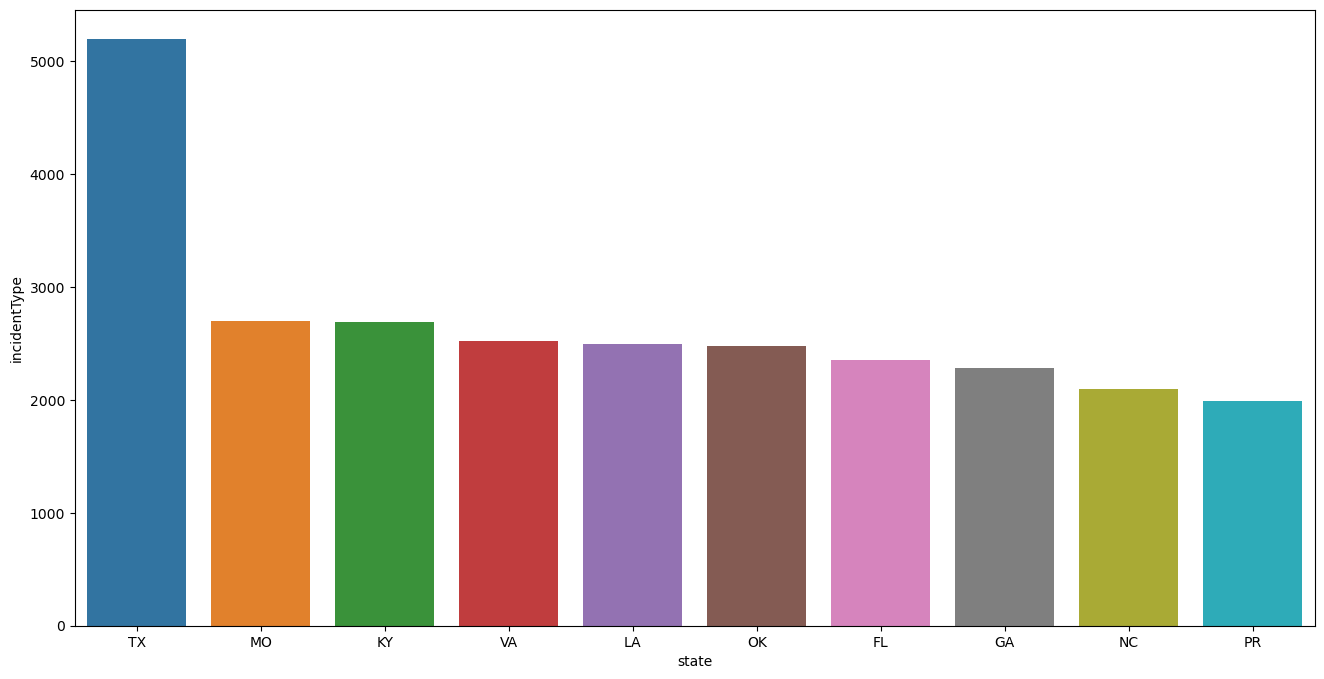

In [3]:
import seaborn as sns
import matplotlib as plt

#States at Maximum Risk

p = df[['state','incidentType']].groupby('state').count()
p.reset_index(inplace=True)
p=p.sort_values(by='incidentType',ascending=False).head(10)
print(p)

plt.pyplot.figure(figsize=(16,8))
sns.barplot(x="state", y="incidentType", data=p,);

In [4]:
print(df.describe(()))
null_counts = df.isnull().sum(axis=0)
print("Null Value Counts (Column-wise): ")
print(null_counts)

       disasterNumber    fyDeclared  ihProgramDeclared  iaProgramDeclared  \
count    64392.000000  64392.000000       64392.000000       64392.000000   
mean      2587.030687   2004.427134           0.168033           0.266912   
std       1409.809806     14.805648           0.373899           0.442349   
min          1.000000   1953.000000           0.000000           0.000000   
50%       3082.000000   2007.000000           0.000000           0.000000   
max       5465.000000   2023.000000           1.000000           1.000000   

       paProgramDeclared  hmProgramDeclared  tribalRequest  fipsStateCode  \
count        64392.00000       64392.000000    64392.00000   64392.000000   
mean             0.93229           0.434029        0.00205      31.583302   
std              0.25125           0.495633        0.04523      16.632906   
min              0.00000           0.000000        0.00000       1.000000   
50%              1.00000           0.000000        0.00000      30.000000  

In [5]:
# Filter the dataset for "Flood" incident type
filtered_df = df[df['incidentType'] == 'Flood']

# Exclude 'lastIAFilingDate' & 'disasterCloseoutDate' column from the DataFrame cz of high null values in it
df = filtered_df.drop('lastIAFilingDate', axis=1)
df = df.drop('disasterCloseoutDate', axis=1)


# Check the null value counts after excluding the column
null_value_counts = df.isnull().sum()

# Print the null value counts
print("Null Value Counts (Column-wise):\n", null_value_counts)

Null Value Counts (Column-wise):
 femaDeclarationString        0
disasterNumber               0
state                        0
declarationType              0
declarationDate              0
fyDeclared                   0
incidentType                 0
declarationTitle             0
ihProgramDeclared            0
iaProgramDeclared            0
paProgramDeclared            0
hmProgramDeclared            0
incidentBeginDate            0
incidentEndDate             43
tribalRequest                0
fipsStateCode                0
fipsCountyCode               0
placeCode                    0
designatedArea               0
declarationRequestNumber     0
lastRefresh                  0
hash                         0
id                           0
dtype: int64


In [6]:
import numpy as np

# Convert the 'incidentBeginDate' and 'incidentEndDate' columns to datetime format
df['incidentBeginDate'] = pd.to_datetime(df['incidentBeginDate'])
df['incidentEndDate'] = pd.to_datetime(df['incidentEndDate'])

# Forward fill the missing values with the most recent non-null value
df['incidentEndDate'].fillna(method='ffill', inplace=True)


In [7]:
# Check the null value counts after excluding the column
null_value_counts = df.isnull().sum()
print("Null Value Counts (Column-wise):\n", null_value_counts)

Null Value Counts (Column-wise):
 femaDeclarationString       0
disasterNumber              0
state                       0
declarationType             0
declarationDate             0
fyDeclared                  0
incidentType                0
declarationTitle            0
ihProgramDeclared           0
iaProgramDeclared           0
paProgramDeclared           0
hmProgramDeclared           0
incidentBeginDate           0
incidentEndDate             0
tribalRequest               0
fipsStateCode               0
fipsCountyCode              0
placeCode                   0
designatedArea              0
declarationRequestNumber    0
lastRefresh                 0
hash                        0
id                          0
dtype: int64


In [1]:
 #Deriving New features
    
#How long the incident took place 
df['Duration_of_Incident'] = (df['incidentEndDate'] - df['incidentBeginDate']).dt.days

#Calculating Declared program Count 
df['Declared_Programs_Count'] = df[['ihProgramDeclared', 'iaProgramDeclared', 'paProgramDeclared', 'hmProgramDeclared']].sum(axis=1)

# Sort the dataframe by state and declarationDate in ascending order
df = df.sort_values(by=['declarationDate'])  
#Time Since Last Disaster each state
df['declarationDate'] = pd.to_datetime(df['declarationDate'])
df['Time Since Last Disaster'] = df.groupby('state')['declarationDate'].diff().dt.days.fillna(0)

NameError: name 'df' is not defined

In [9]:
from sklearn.preprocessing import StandardScaler

numerical_columns = ['disasterNumber', 'fyDeclared', 'ihProgramDeclared', 'iaProgramDeclared', 'paProgramDeclared',
                     'hmProgramDeclared', 'tribalRequest', 'fipsStateCode', 'fipsCountyCode', 'placeCode', 'declarationRequestNumber']

# Apply standardization
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.to_csv('disaster_declaration_processed.csv', index=False)
print(df.head())



    femaDeclarationString  disasterNumber state declarationType  \
637            DR-4711-KY        1.990992    KY              DR   
638            DR-4711-KY        1.990992    KY              DR   
639            DR-4711-KY        1.990992    KY              DR   
640            DR-4711-KY        1.990992    KY              DR   
641            DR-4711-KY        1.990992    KY              DR   

              declarationDate  fyDeclared incidentType  \
637 2023-05-09 00:00:00+00:00    1.722529        Flood   
638 2023-05-09 00:00:00+00:00    1.722529        Flood   
639 2023-05-09 00:00:00+00:00    1.722529        Flood   
640 2023-05-09 00:00:00+00:00    1.722529        Flood   
641 2023-05-09 00:00:00+00:00    1.722529        Flood   

                                      declarationTitle  ihProgramDeclared  \
637  SEVERE STORMS, STRAIGHT-LINE WINDS, FLOODING, ...          -0.249851   
638  SEVERE STORMS, STRAIGHT-LINE WINDS, FLOODING, ...          -0.249851   
639  SEVERE STORM

In [10]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = df.drop('incidentType', axis=1)  
y = df['incidentType']

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#display the number of samples in each set
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (7505, 25) (7505,)
Testing set shape: (3217, 25) (3217,)


In [11]:
# Save all datasets as CSV files
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)